In [1]:
!pip install pennylane

   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 21.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/930.8 kB ? eta -:--:--
   --------------------------------------- 930.8/930.8 kB 21.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.5 MB ? eta -:--:--
   ---------------------------------------- 6.5/6.5 MB 49.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.1 MB ? eta -:--:--
   ---------------------------------------- 7.1/7.1 MB 62.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 57.2 MB/s eta 0:00:00

   --------- ------------------------------  3/13 [scipy-openblas32]
   ------------ ---------------------------  4/13 [networkx]
   ------------ ---------------------------  4/13 [networkx]
   ------------ ---------------------------  4/13 [networkx]
   ---------

In [2]:
import pennylane as qml

# Quantum Galton Board When n=2

[0.   0.49 0.51 0.  ]


(<Figure size 700x500 with 1 Axes>, <Axes: >)

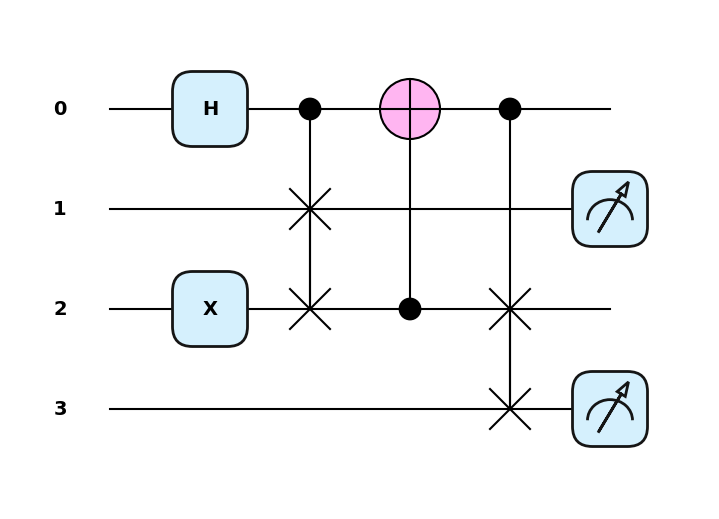

In [3]:
from utils import qalton

qc = qalton.build_galton_circuit(levels=2, num_shots=1000)
print(qc())
qml.draw_mpl(qc, style="pennylane")()

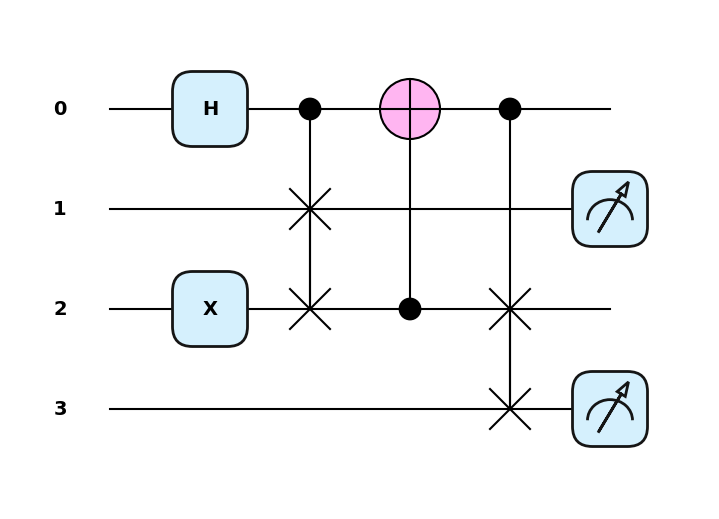

In [6]:
dev = qml.device("default.qubit", wires=4, shots=10000)

@qml.qnode(dev)
def n1circuit():
  # 1. H gate on q0, and x gate on q2
  # 2. controlled SWAP gate w/ control as q0, and targets as q1 & q2
  # 3. cnot gate w/ control as q2 and target as q0
  # 4. controlled SWAP gate w/ control as q0, and targets as q2 & q3
  # 5. find probabilities of q1 & q3

  qml.Hadamard(wires=[0])
  qml.PauliX(wires=[2])
  qml.CSWAP(wires=[0,1,2])
  qml.CNOT(wires=[2,0])
  qml.CSWAP(wires=[0,2,3])
  return qml.probs(wires=[1,3])

qml.draw_mpl(n1circuit,style='pennylane')(); #draws circuit

# Simulation for 1-Peg Galton Board

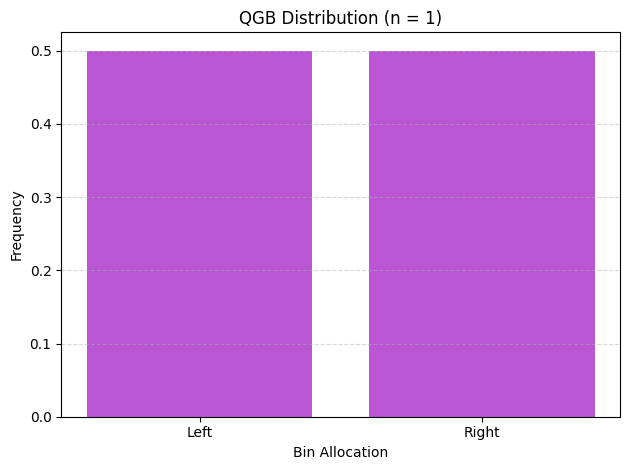

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# so we should have two qubits -> possibilities are |00>, |01>, |10>, and |11>;
# If it's bounces to the left then it's 0. If it bounces to the right then it's 1.
# We need to count the number of 1s to figure out how far to the right it went.
# E.g. n=3 galton board -> 4 bins.
# 0 1 2 3 <- Bin # from left to right. Let's check all possibilities.
# |000> -> left, left, left -> count = 0 -> Bin 0 (leftmost bin)
# |001> -> left, left, right -> count = 1 -> Bin 1
# |010> -> left, right, left -> count = 1 -> Bin 1
# |011> -> left, right, right -> count = 2 -> Bin 2
# |100> -> right, left, left -> count = 1 -> Bin 1
# |101> -> left, left, left -> count = 2 -> Bin 2
# |110> -> right, right, left -> count = 2 -> Bin 2
# |111> -> right, right, right -> count = 3 -> Bin 3

prob1 = np.array(n1circuit()) #move probabilities of circuit to here

# I have no idea which one goes right and which one goes left
prob_left = prob1[2]
prob_right = prob1[1]

#Plotting time!
plt.bar([0, 1], [prob_left, prob_right], color='mediumorchid')
plt.xticks([0, 1], ['Left', 'Right'])
plt.xlabel("Bin Allocation")
plt.ylabel("Frequency")
plt.title("QGB Distribution (n = 1)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Quantum Galton Board When n=3

array([0.    , 0.236 , 0.5104, 0.    , 0.2536, 0.    , 0.    , 0.    ])

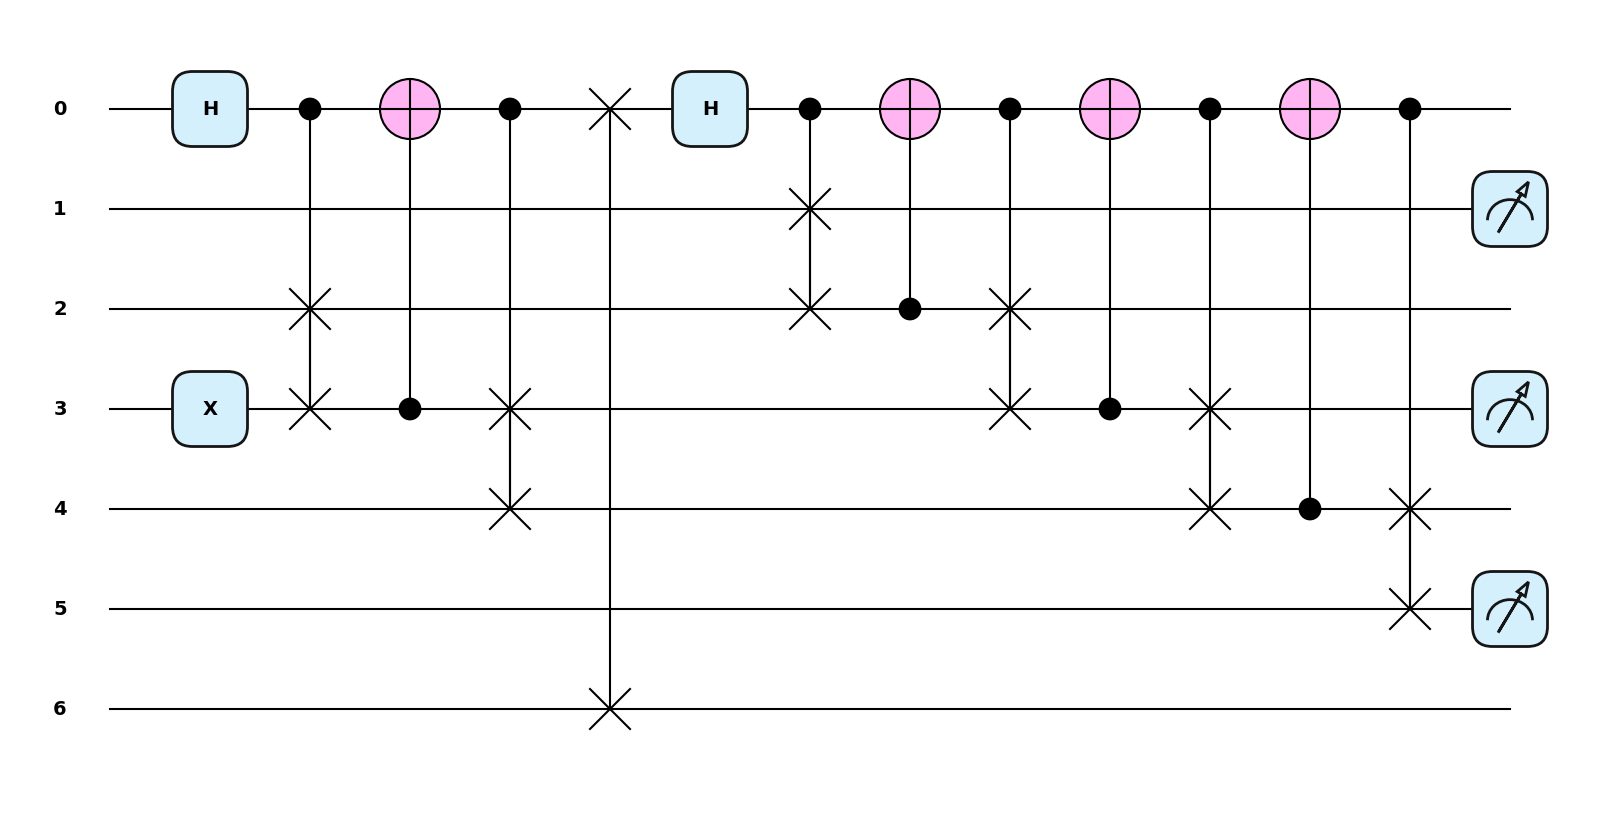

In [8]:
dev2 = qml.device("default.qubit", wires=7, shots=10000)

@qml.qnode(dev2)
def n2circuit():
  # 1. H gate on q0, and x gate on q3
  # 2. controlled SWAP gate w/ control as q0, and targets as q2 & q3
  # 3. cnot gate w/ control as q3 and target as q0
  # 4. controlled SWAP gate w/ control as q0, and targets as q3 & q4
  # 5. reset q0 as |0>
  # ----- so at this part I don't understand why they do this
  # 6. H gate on q0
  # 7. CSWAP w/ control as q0, and targets as q1 & q2
  # 8. CNOT w/ control as q2 and target as q0
  # ------
  # 9. CSWAP w/ control as q0, and targets as q2 & q3
  # 10. CNOT w/ control as q3 and target as q0
    # ------
  # 9. CSWAP w/ control as q0, and targets as q3 & q4
  # 10. CNOT w/ control as q4 and target as q0
    # ------
  # 9. CSWAP w/ control as q0, and targets as q4 & q5
  #10. Measure q1, q3, and q5

  qml.Hadamard(wires=[0])
  qml.PauliX(wires=[3])
  qml.CSWAP(wires=[0,2,3])
  qml.CNOT(wires=[3,0])
  qml.CSWAP(wires=[0,3,4])
  qml.SWAP(wires=[0, 6]) #swap it with an unused qubit on wire 6 to reset it to |0>

  # Reset control wire
  # m = qml.measure(wires=[0])
  # qml.cond(m, qml.PauliX)(0)  # If measured as 1, applies NOT

  qml.Hadamard(wires=[0])
  qml.CSWAP(wires=[0, 1, 2])
  qml.CNOT(wires=[2, 0])
  qml.CSWAP(wires=[0, 2, 3])
  qml.CNOT(wires=[3, 0])
  qml.CSWAP(wires=[0, 3, 4])
  qml.CNOT(wires=[4, 0])
  qml.CSWAP(wires=[0, 4, 5])

  return qml.probs(wires=[1,3,5])

qml.draw_mpl(n2circuit,style='pennylane')(); #draws circuit
n2circuit() #probability for 1 peg

# Simulation for 3-Peg Galton Board



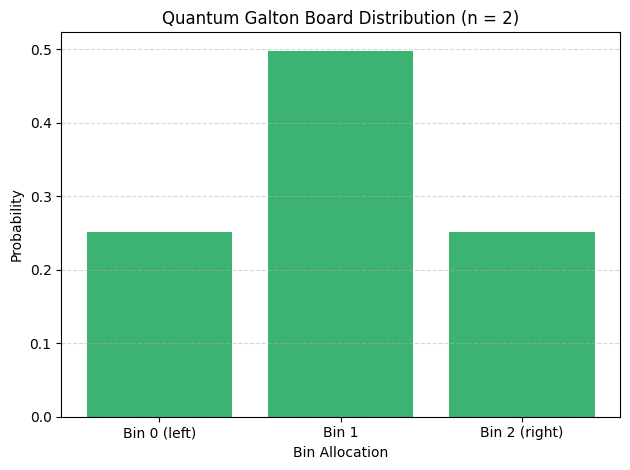

In [9]:
from matplotlib import pyplot as plt

# Run simulation
probs2 = n2circuit()

# Extract probabilities
prob_bin0 = probs2[4]
prob_bin1 = probs2[2]
prob_bin2 = probs2[1]

# Plot
plt.bar([0, 1, 2], [prob_bin0, prob_bin1, prob_bin2], color='mediumseagreen')
plt.xticks([0, 1, 2], ['Bin 0 (left)', 'Bin 1', 'Bin 2 (right)'])
plt.xlabel("Bin Allocation")
plt.ylabel("Probability")
plt.title("Quantum Galton Board Distribution (n = 2)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Quantum Galton Board when n=4

array([0.    , 0.126 , 0.3719, 0.    , 0.38  , 0.    , 0.    , 0.    ,
       0.1221, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ])

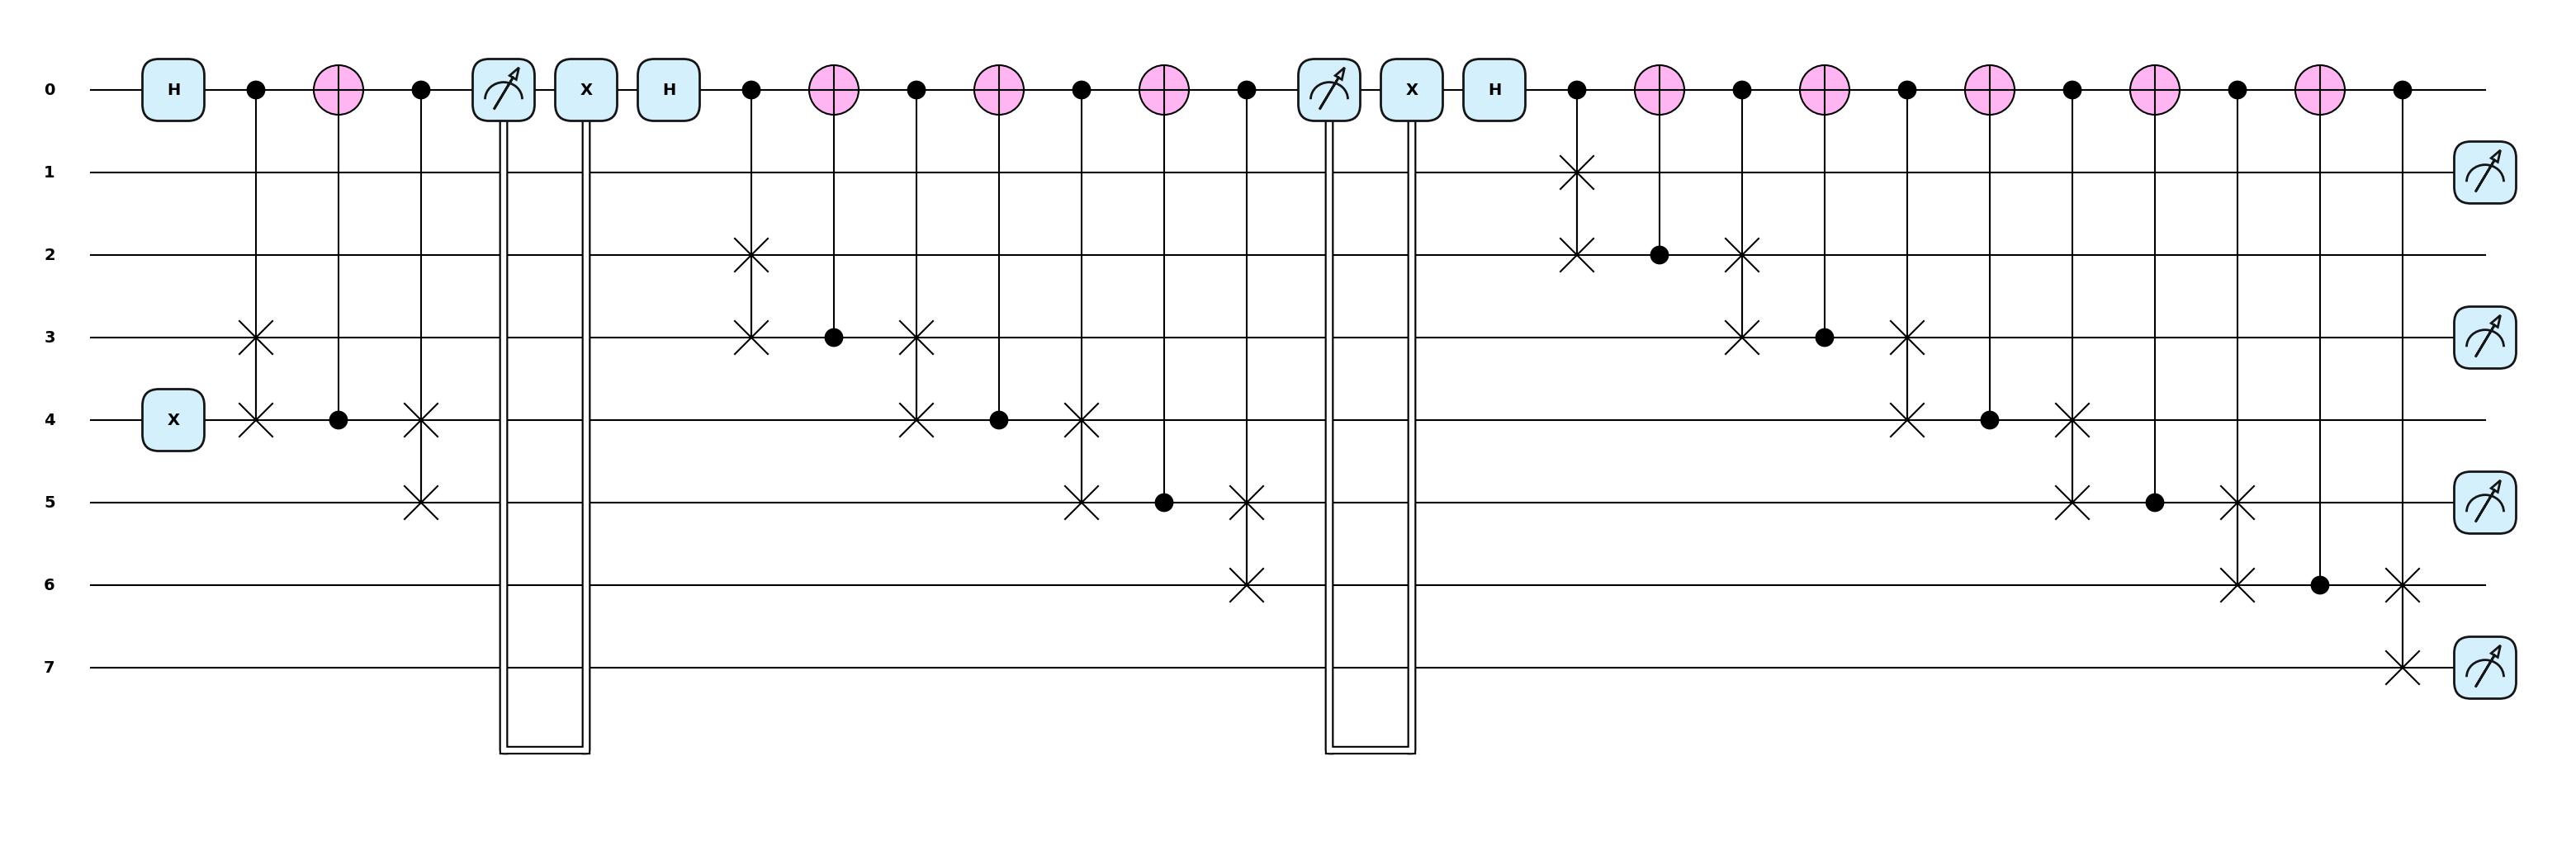

In [10]:
n=4
dev3 = qml.device("default.qubit", wires=2*n, shots=10000)

@qml.qnode(dev3)
def n4circuit():
    #
    qml.Hadamard(wires=[0])
    qml.PauliX(wires=[4])
    qml.CSWAP(wires=[0,3,4])
    qml.CNOT(wires=[4,0])
    qml.CSWAP(wires=[0,4,5])
    
    # Reset control wire
    m = qml.measure(wires=[0])
    qml.cond(m, qml.PauliX)(0)  # If measured as 1, applies NOT
    
    qml.Hadamard(wires=[0])
    qml.CSWAP(wires=[0, 2, 3])
    qml.CNOT(wires=[3, 0])
    qml.CSWAP(wires=[0, 3, 4])
    qml.CNOT(wires=[4, 0])
    qml.CSWAP(wires=[0, 4, 5])
    qml.CNOT(wires=[5, 0])
    qml.CSWAP(wires=[0, 5, 6])

    # Reset control wire
    m = qml.measure(wires=[0])
    qml.cond(m, qml.PauliX)(0)  # If measured as 1, applies NOT

    qml.Hadamard(wires=[0])
    qml.CSWAP(wires=[0, 1, 2])
    qml.CNOT(wires=[2, 0])
    qml.CSWAP(wires=[0, 2, 3])
    qml.CNOT(wires=[3, 0])
    qml.CSWAP(wires=[0, 3, 4])
    qml.CNOT(wires=[4, 0])
    qml.CSWAP(wires=[0, 4, 5])
    qml.CNOT(wires=[5,0])
    qml.CSWAP(wires=[0, 5,6])
    qml.CNOT(wires=[6, 0])
    qml.CSWAP(wires=[0, 6,7])

    return qml.probs(wires=[1,3,5,7])

qml.draw_mpl(n4circuit,style='pennylane')(); #draws circuit
n4circuit() #probability for 1 peg

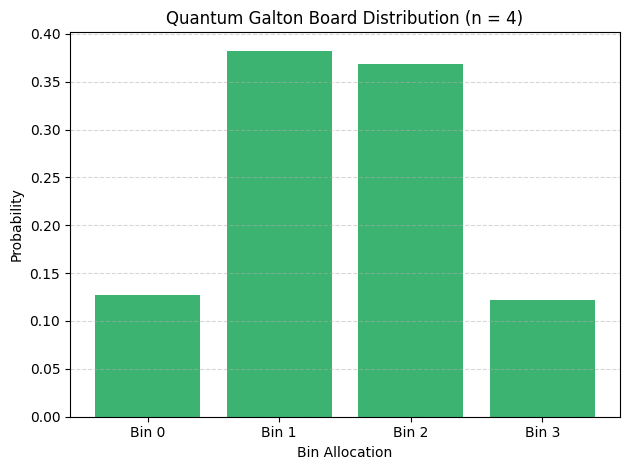

In [11]:
from matplotlib import pyplot as plt

# Run simulation
probs4 = n4circuit()

# Extract probabilities
prob_bin0 = probs4[int('1000', 2)]
prob_bin1 = probs4[int('0100', 2)]
prob_bin2 = probs4[int('0010', 2)]
prob_bin3 = probs4[int('0001', 2)]

# Plot
plt.bar([0, 1, 2, 3], [prob_bin0, prob_bin1, prob_bin2, prob_bin3], color='mediumseagreen')
plt.xticks([0, 1, 2, 3], ['Bin 0', 'Bin 1', 'Bin 2', 'Bin 3'])
plt.xlabel("Bin Allocation")
plt.ylabel("Probability")
plt.title("Quantum Galton Board Distribution (n = 4)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Quantum Galton Board when n=5

array([0.    , 0.0632, 0.2486, 0.    , 0.3754, 0.    , 0.    , 0.    ,
       0.2473, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.0655, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ])

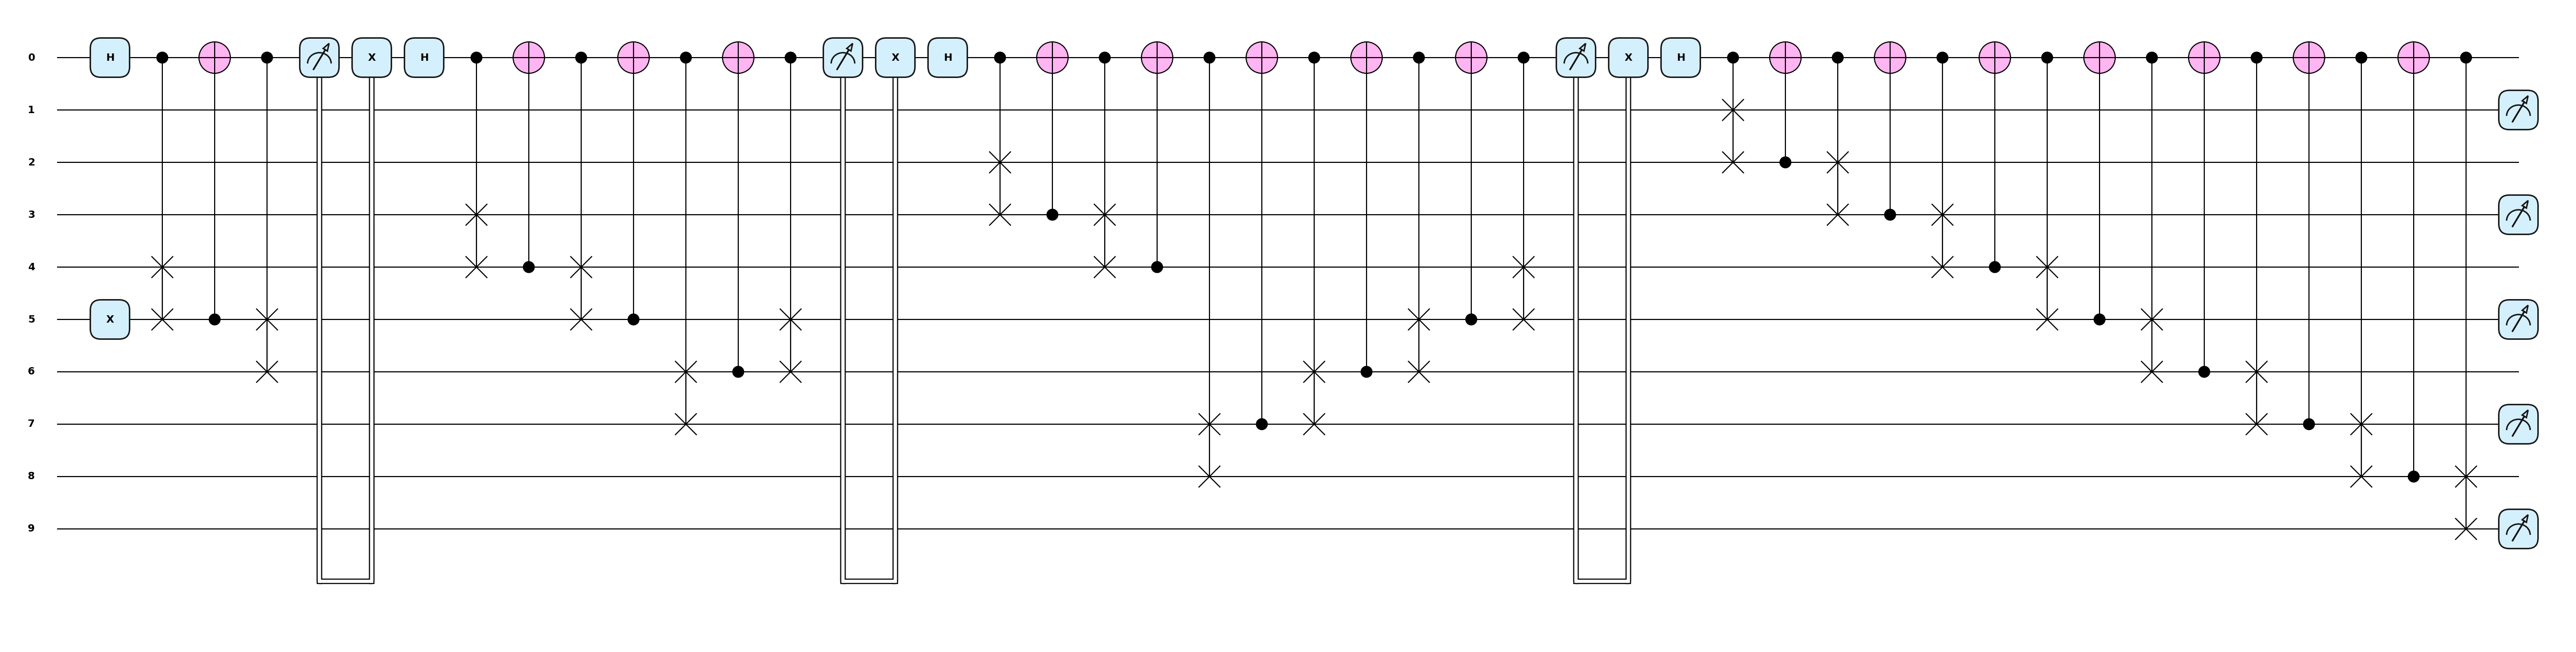

In [12]:
n=5
dev4 = qml.device("default.qubit", wires=2*n, shots=10000)

@qml.qnode(dev4)
def n5circuit():
    #
    qml.Hadamard(wires=[0])
    qml.PauliX(wires=[5])
    qml.CSWAP(wires=[0,4,5])
    qml.CNOT(wires=[5,0])
    qml.CSWAP(wires=[0,5,6])
    
    # Reset control wire
    m = qml.measure(wires=[0])
    qml.cond(m, qml.PauliX)(0)  # If measured as 1, applies NOT
    
    qml.Hadamard(wires=[0])
    qml.CSWAP(wires=[0, 3, 4])
    qml.CNOT(wires=[4, 0])
    qml.CSWAP(wires=[0, 4, 5])
    qml.CNOT(wires=[5, 0])
    qml.CSWAP(wires=[0, 6, 7])
    qml.CNOT(wires=[6, 0])
    qml.CSWAP(wires=[0, 5, 6])

    # Reset control wire
    m = qml.measure(wires=[0])
    qml.cond(m, qml.PauliX)(0)  # If measured as 1, applies NOT

    qml.Hadamard(wires=[0])
    qml.CSWAP(wires=[0, 2, 3])
    qml.CNOT(wires=[3, 0])
    qml.CSWAP(wires=[0, 3, 4])
    qml.CNOT(wires=[4, 0])
    qml.CSWAP(wires=[0, 7, 8])
    qml.CNOT(wires=[7, 0])
    qml.CSWAP(wires=[0, 6, 7])
    qml.CNOT(wires=[6,0])
    qml.CSWAP(wires=[0, 5,6])
    qml.CNOT(wires=[5, 0])
    qml.CSWAP(wires=[0, 4, 5])

    # Reset control wire
    m = qml.measure(wires=[0])
    qml.cond(m, qml.PauliX)(0)  # If measured as 1, applies NOT

    qml.Hadamard(wires=[0])

    qml.CSWAP(wires=[0, 1, 2])
    qml.CNOT(wires=[2, 0])

    qml.CSWAP(wires=[0, 2, 3])
    qml.CNOT(wires=[3, 0])

    qml.CSWAP(wires=[0, 3, 4])
    qml.CNOT(wires=[4, 0])

    qml.CSWAP(wires=[0, 4, 5])
    qml.CNOT(wires=[5,0])

    qml.CSWAP(wires=[0, 5,6])
    qml.CNOT(wires=[6, 0])

    qml.CSWAP(wires=[0, 6, 7])
    qml.CNOT(wires=[7, 0])

    qml.CSWAP(wires=[0, 7, 8])
    qml.CNOT(wires=[8, 0])

    qml.CSWAP(wires=[0, 8, 9])

    return qml.probs(wires=[1,3,5,7,9])

qml.draw_mpl(n5circuit,style='pennylane')(); #draws circuit
n5circuit() #probability for 1 peg

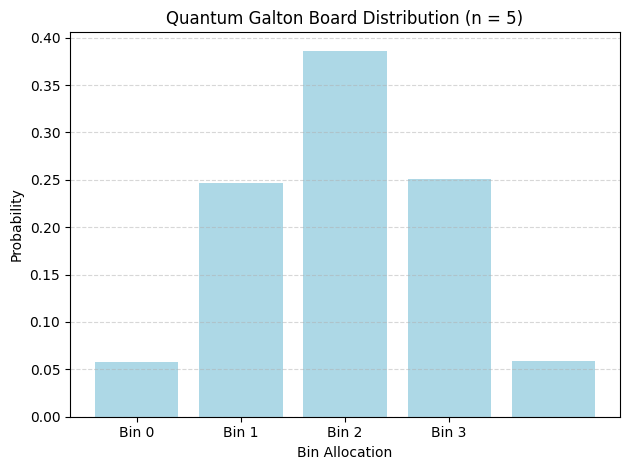

In [13]:
from matplotlib import pyplot as plt

# Run simulation
probs5 = n5circuit()

# Extract probabilities
prob_bin0 = probs5[int('10000', 2)]
prob_bin1 = probs5[int('01000', 2)]
prob_bin2 = probs5[int('00100', 2)]
prob_bin3 = probs5[int('00010', 2)]
prob_bin4 = probs5[int('00001', 2)]

# Plot
plt.bar([0, 1, 2, 3,4], [prob_bin0, prob_bin1, prob_bin2, prob_bin3, prob_bin4], color='lightblue')
plt.xticks([0, 1, 2, 3], ['Bin 0', 'Bin 1', 'Bin 2', 'Bin 3'])
plt.xlabel("Bin Allocation")
plt.ylabel("Probability")
plt.title("Quantum Galton Board Distribution (n = 5)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()